# Simple Movie Reviews Analysis Using Logistic Regression

> In this notebook, we gonna make a simple NLP model on labeled data set, and make prediction on a non labled dataset. The given labled dataset is about opinion on movies from audience and the following sentiments. Those sentiments are 0 which is negative review or 1 which is positive review. 

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import pandas, numpy and matplotlib. Load the datasets save it in objects called data, data_test

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review.csv', encoding='utf-8', sep='\t')
data_test = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', encoding='utf-8', sep='\t')


### Over view data

- The dataset has 2500 rows and 3 columns with no null value. 
- We gonna use 'review', and 'sentiment' columns for evaluation. 
> - We can see some expression like 'wonderful film', 'good movie'... belong to positive reviews, and 'so bad', 'boring stuff'... belong to negative reivews. But sometime it is more complicated when 'good idea w\ this movie' appear in a negative reviews. So it's interesting to see how the computer handle that.
> - Those review are short paragraphs which is a long string have numbers, word, symbols, html markup. We have to clean it up and repair for vetorization.

In [22]:
# Take a look at data to have a overall sense
data.sample(10)

,id,review,sentiment
6862,5241_3,Tell the truth Iâm a bit stun to see all the...,0
22307,691_3,This one probably does not fit in the bottom o...,0
22437,11117_10,"Not only do the storylines in \The Sopranos\"" ...",1
6521,10946_7,Don't listen to the prissy critics who are pro...,1
1677,9492_4,"One star for the \plot\"". One star for the act...",0
8144,12115_4,I've been working my way through a collection ...,0
6691,11346_10,I grew up with H.R. Pufnstuff and the dashingl...,1
7672,2627_9,"Finally, Timon and Pumbaa in their own film......",1
6464,4146_1,"After watching this thing, then reading the su...",0
16235,7148_1,Before watching this film I had very low expec...,0


In [23]:
# Check for null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [24]:
# Check for duplication
data['id'].nunique() == data.shape[0]

True

In [25]:
# Check if any values in 'setiment' columns have different number from 0 and 1
(data['sentiment'] == 1).sum() + (data['sentiment'] == 0).sum() == data.shape[0]

True

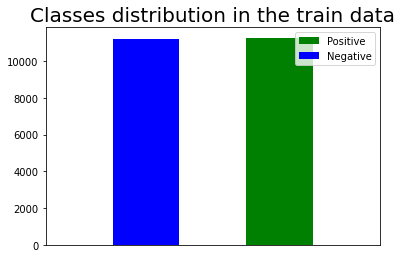

In [26]:
# Check balance of train data
plt.hist(data[data['sentiment'] == 1]['sentiment'],
         bins=2, color='green', label='Positive')
plt.hist(data[data['sentiment'] == 0]['sentiment'],
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution in the train data', fontsize=20)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

In [27]:
# Take a look at a review
data['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [28]:
# Remove HTML markup
text = BeautifulSoup(data['review'][0]).get_text()
print(text)

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

In [29]:
# Save emoticons for later appending
for text in data['review'][:200]:
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  print(emoticons)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[':)']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [30]:
# Remove any non-word character and append the emoticons,
# removing the nose character for standarization. Convert to lower case
text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
print(text)

hi everyone my names larissa i m 13 years old when i was about 4 years old i watch curly sue and it knocked my socks of i have been watching that movie for a long time in fact about 30 minutes ago i just got done watching it alisan porter is a really good actor and i love that movie its so funny when she is dealing the cards every time i watch that movie at the end of it i cry its so said i know i m only 13 years old but its such a touching story its really weird thats alisan is 25 years old now every time i watch a movie someone is always young and the movie comes out like a year after they make it and when u watch it and find out how old the person in the movie really is u wounder how they can go from one age to the next like harry potter that movie was also great but still daniel was about 12 years old in the first movie and i was about 11 so how could he go from 12 to 16 in about 4 years and i m only 13 i m not sure if he is 16 right now i think he is almost 18 but thats kind of we

In [31]:
# Remove stop words
import nltk
from nltk.corpus import stopwords

text = [word for word in text.split(' ') if not word in stopwords.words("english")]
print(text)



['hi', 'everyone', 'names', 'larissa', '13', 'years', 'old', '4', 'years', 'old', 'watch', 'curly', 'sue', 'knocked', 'socks', 'watching', 'movie', 'long', 'time', 'fact', '30', 'minutes', 'ago', 'got', 'done', 'watching', 'alisan', 'porter', 'really', 'good', 'actor', 'love', 'movie', 'funny', 'dealing', 'cards', 'every', 'time', 'watch', 'movie', 'end', 'cry', 'said', 'know', '13', 'years', 'old', 'touching', 'story', 'really', 'weird', 'thats', 'alisan', '25', 'years', 'old', 'every', 'time', 'watch', 'movie', 'someone', 'always', 'young', 'movie', 'comes', 'like', 'year', 'make', 'u', 'watch', 'find', 'old', 'person', 'movie', 'really', 'u', 'wounder', 'go', 'one', 'age', 'next', 'like', 'harry', 'potter', 'movie', 'also', 'great', 'still', 'daniel', '12', 'years', 'old', 'first', 'movie', '11', 'could', 'go', '12', '16', '4', 'years', '13', 'sure', '16', 'right', 'think', 'almost', '18', 'thats', 'kind', 'weird', 'u', 'look', 'one', 'movie', 'next', '4', 'years', 'old', 'u', '1', 

In [32]:
# Stem words
from nltk.stem.snowball import SnowballStemmer
snowball_stem = SnowballStemmer('english')
words_stem = [snowball_stem.stem(word) for word in text]
print(words_stem)

['hi', 'everyon', 'name', 'larissa', '13', 'year', 'old', '4', 'year', 'old', 'watch', 'cur', 'sue', 'knock', 'sock', 'watch', 'movi', 'long', 'time', 'fact', '30', 'minut', 'ago', 'got', 'done', 'watch', 'alisan', 'porter', 'realli', 'good', 'actor', 'love', 'movi', 'funni', 'deal', 'card', 'everi', 'time', 'watch', 'movi', 'end', 'cri', 'said', 'know', '13', 'year', 'old', 'touch', 'stori', 'realli', 'weird', 'that', 'alisan', '25', 'year', 'old', 'everi', 'time', 'watch', 'movi', 'someon', 'alway', 'young', 'movi', 'come', 'like', 'year', 'make', 'u', 'watch', 'find', 'old', 'person', 'movi', 'realli', 'u', 'wounder', 'go', 'one', 'age', 'next', 'like', 'harri', 'potter', 'movi', 'also', 'great', 'still', 'daniel', '12', 'year', 'old', 'first', 'movi', '11', 'could', 'go', '12', '16', '4', 'year', '13', 'sure', '16', 'right', 'think', 'almost', '18', 'that', 'kind', 'weird', 'u', 'look', 'one', 'movi', 'next', '4', 'year', 'old', 'u', '1', 'last', 'sure', 'big', 'imagin', 'like', 'r

### Vectorize data
> - Bag of words, TfidfVectorizer
> - Tokenize with MWEtokenizer
> - Stemming with SnowballStemmer('english')
> - Adding more stop words from most common words in reviews


In [33]:
# Prepare tfidf vector for model training

import nltk
nltk.download('stopwords')
from bs4 import BeautifulSoup      
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import MWETokenizer

tokenizer = MWETokenizer()
Snowball_stem = SnowballStemmer('english')

stop = stopwords.words('english')
stop = stop + ['befor', 'movi', 'onc', 'onli', 'ourselv', 'stori', 'themselv', 'thi', 'wa', 'whi', 'yourselv', 'movie','film','movies', 'films', 'story', 'doe', 'dure']
stop.remove('not')

def tokenizer_stem(text):
    return [Snowball_stem.stem(word) for word in tokenizer.tokenize(text.split())]

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = BeautifulSoup(text).get_text()
    #text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_stem,
                        preprocessor=preprocessor,
                        ngram_range=(1, 1))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Take a look at tfidf vector
print(tfidf)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function preprocessor at 0x7f408d0648c8>,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_stem at 0x7f408d508268>,
                u

### Training model
> - Split labled data to for tranining and testting model
> - After finding the best model, we use all labled data for retraining model and hope for better prediction

In [0]:
# split the dataset in train and test

from sklearn.model_selection import train_test_split

X = data['review']
#X_test = data_test['review']
y = data['sentiment']
#y_test = data_test['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

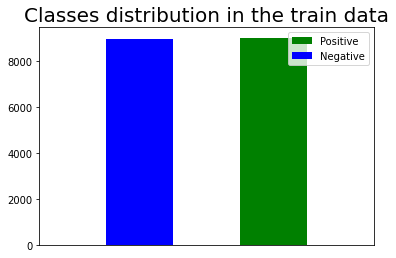

In [36]:
# Check balance train set
plt.hist(y_train[y_train == 1],
         bins=2, color='green', label='Positive')
plt.hist(y_train[y_train == 0],
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution in the train data', fontsize=20)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

In [37]:
# Fit train data for traning process
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create pipline
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0, max_iter=1000))])
# Fit data and train model
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'veri'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f408d0648c8>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_stem at 0x7f408d508268>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
           

In [0]:
# Test model
predictions = clf.predict(X_test)

In [39]:
# Check accuracy:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(predictions, y_test)
confusion_matrix(predictions, y_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2253
           1       0.88      0.90      0.89      2247

    accuracy                           0.89      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.89      0.89      0.89      4500



In [40]:
# After chose a best model so far, let's retrain it with more data
X = data['review']
y = data['sentiment']
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f408d0648c8>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_stem at 0x7f408d508268>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
           

In [41]:
# Take a look at unlabled data set
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2500 non-null   object
 1   review  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [0]:
data_test['predict_sentiment'] = clf.predict(data_test['review'])

In [0]:
# summit
import os
data_test.to_csv('KieuTuanAnh.csv', index=False)

### What else can we do?
> - Above is very basic NLP model. There's plenty ways to build a better model. I tried Lemmatizer, Bigram, other Tokenizer, but haven't had a good result yet. And a lot more method that haven't tried.

- https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e
- https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
- https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

